<h1 style="font-family:verdana;"> <center>📚 Introduction to Data Science Assignment Group 138📚</center> </h1>
<p><center style="color:#159364; font-family:cursive;">BSE Prediction</center></p>
<p><center style="color:#159364; font-family:cursive;">
 <table>
  <tr>
    <th>Name</th>
    <th>Student No</th>
  </tr>
  <tr>
    <td>Sughosh P Dixit</td>
    <td>2021FA04058</td>
  </tr>
</table> 
</p>

![Stay Home](https://cdn.dribbble.com/users/5055/screenshots/3384210/media/f0167c09a5b9c70b17a9e3e84b61c6ea.jpg?compress=1&resize=800x600&vertical=top)
<cite><center><b>Action Required</b></center></cite>

<h4 style="font-family:verdana;"> <center>🤔 What is the dependent variable?</center> </h4>

<div style="font-family:verdana; word-spacing:1.5px;">
    <h5 id="emoji">
        Let's explore data before we make claims which is a dependent variable and which is independent
        <br>
    </h5>
</div>

In [72]:
# The aim of this analysis is to predict tips given set of parameters
# Libraries are loaded first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('BSE_Sensex_BSE30_Data.csv')

In [2]:
df.head(5)

,Company,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,ASIANPAINTS,09-06-2021,2936.00,2964.95,2920.40,2944.1,2950.193110,124701,6780,367892031.0,77662.0,62.28,44.55,8.10
1,ASIANPAINTS,08-06-2021,2922.70,2944.65,2906.90,2928.1,2925.331755,73054,4851,213707186.0,45761.0,62.64,37.75,5.40
2,ASIANPAINTS,07-06-2021,2930.00,2940.00,2904.55,2934.1,2917.421700,155798,2311,454528466.0,141076.0,90.55,35.45,4.10
3,ASIANPAINTS,04-06-2021,2946.25,2990.00,2909.25,2924.0,2944.749653,83656,3288,246345977.0,49730.0,59.45,80.75,-22.25
4,ASIANPAINTS,03-06-2021,2906.00,2941.95,2904.00,2934.9,2919.255570,47709,4583,139274764.0,20508.0,42.99,37.95,28.90


<ol>
        <li>
            <b>Company </b> - Company is a independent variable/feature
        </li>
        <li>
            <b>Date </b> - Date on which we have all the other column derive data from which too is an independent variable
        </li>
        <li>
            <b>Open Price </b> - The price at which the stock opens for the day
        </li>
        <li>
            <b>High Price </b> - The highest price the stock fetched during that trading day
        </li>
        <li>
            <b>Low Price </b> - The lowest price the stock fetched during that trading day
        </li>
        <li>
            <b>Close Price </b> - The price at which the stock closed after the trading day
        </li>
        <li>
            <b>WAP </b> - Weighted Average Price for the day
        </li>
        <li>
            <b>No of Shares </b> - No. of shares traded throughout the day
        </li>
        <li>
            <b>No of Trades </b> - The number of buy and sell trades happened throughout the day
        </li>
        <li>
            <b>Total Turnover (Rs.) </b> - The total turnover based on the no of shares traded in that day
        </li>
        <li>
            <b>Deliverable Quantity </b> - Deliverable quantity of shares is which actually move from one set of people (who had those shares in their demat
        </li>
    </ol>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77550 entries, 0 to 77549
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company                    77550 non-null  object 
 1   Date                       77550 non-null  object 
 2   Open Price                 77550 non-null  float64
 3   High Price                 77550 non-null  float64
 4   Low Price                  77550 non-null  float64
 5   Close Price                77550 non-null  float64
 6   WAP                        77550 non-null  float64
 7   No.of Shares               77550 non-null  int64  
 8   No. of Trades              77550 non-null  int64  
 9   Total Turnover (Rs.)       77550 non-null  float64
 10  Deliverable Quantity       77520 non-null  float64
 11  % Deli. Qty to Traded Qty  77520 non-null  float64
 12  Spread High-Low            77550 non-null  float64
 13  Spread Close-Open          77550 non-null  flo

In [4]:
df.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,77550.000000,77550.000000,77550.000000,77550.000000,77550.000000,7.755000e+04,77550.000000,7.755000e+04,7.752000e+04,77520.000000,77550.000000,77550.000000
mean,1524.554520,1542.795752,1504.390718,1522.890123,1523.685145,3.573101e+05,6126.222424,2.461719e+08,1.607621e+05,35.556759,38.405034,-1.664397
std,2020.707802,2043.153068,1994.927133,2018.133986,2018.951727,2.982527e+06,7972.124506,3.317675e+09,2.816236e+06,18.594746,62.606059,44.313552
min,76.000000,79.100000,74.000000,76.200000,76.965548,3.900000e+01,4.000000,3.979300e+04,3.300000e+01,0.160000,0.550000,-1381.300000
25%,428.000000,434.000000,421.000000,427.112500,427.610724,4.413025e+04,1713.000000,4.142412e+07,1.194475e+04,22.280000,10.250000,-9.150000
50%,879.700000,890.000000,866.650000,878.425000,878.491202,1.195705e+05,3443.000000,1.013631e+08,3.580750e+04,31.600000,20.200000,-0.850000
75%,1689.800000,1708.000000,1668.162500,1686.250000,1687.615467,3.306492e+05,7338.750000,2.491327e+08,1.051470e+05,44.350000,40.750000,6.450000
max,18721.000000,18821.450000,18523.450000,18723.350000,18678.344710,3.973114e+08,197442.000000,5.100000e+11,3.968565e+08,99.990000,1950.000000,1523.300000


<h2 style="font-family:verdana;"> <center style="color:#159364; font-family:cursive;">(1) What is the dependent variable?</center> </h2>
<ol>
        <li>
            <b>Open Price </b> - Dependent Variable
        </li>
        <li>
            <b>High Price </b> - Dependent Variable
        </li>
        <li>
            <b>Low Price </b> - Dependent Variable
        </li>
        <li>
            <b>Close Price </b> - Dependent Variable
        </li>
        <li>
            <b>WAP </b> - Dependent Variable
        </li>
        <li>
            <b>No of Shares </b> - Dependent Variable
        </li>
        <li>
            <b>No of Trades </b> - Dependent Variable
        </li>
        <li>
            <b>Total Turnover (Rs.) </b> - Dependent Variable
        </li>
        <li>
            <b>Deliverable Quantity </b> - Dependent Variable
        </li>
    </ol>

<h2 style="font-family:verdana;"> <center style="color:#159364; font-family:cursive;"> (2) Choose the independent variables? [at least 2 variables] </center> </h2>
<ol>
        <li>
            <b>Company </b> - Independent Variable/feature
        </li>
        <li>
            <b>Date </b> - Independent Variable/feature       
        </li>
    </ol>

<h2>To get overall data prediction let us consider summed RAW data of the BSE Index</h2>

<h2 style="font-family:verdana;"> <center style="color:#159364; font-family:cursive;"> (3) Get data of last many years till June’2021. Prepare the data for Model building.
     Justify your choice for granularity of data, length of data and any other considerations. 
     Present excel sheet for both the raw data and cleaned data.
 </center> </h2>

<div style="font-family:verdana; word-spacing:1.5px;">
    <h3 id="emoji">
        We have last 10 year's data of the S&P Sensex Index with the above mentioned data points and features. Let us examine the raw data and further preprocess the data and reexamine and see the difference.
        <br>
    </h3>
</div>
<ul>
    <li>
        The S&P Sensex index has 30 listed companies whose last 10 years data is collected.
    </li>
    <li>
         Each stock contains 13 columns which are listed above
    </li>   
    <li>
        Granular data is detailed data, or the lowest level that data can be in a target set. It refers to the size that data fields are divided into, in short how detail-oriented a single field is. Since we are dealing with 13 columns pertaining to the stock of a company, it can be considered more granular since we are not considering handful of data points
    </li>
    <li>
        There are two independent variables/features that are considered in the dataset namely Company and date
    </li>
</div>

 <div style="font-family:verdana; word-spacing:1.5px;"><h3><center style="color:#159364; font-family:cursive;">Data preprocess</center></h3></div>

In [143]:
#new_df = pd.read_excel('BSE_Sensex_Raw_Data.xlsx')
new_df = pdr.get_data_yahoo("%5EBSESN", start="2011-01-01", end="2021-08-03")
new_df.columns

[*********************100%***********************]  1 of 1 completed


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

<div style="font-family:verdana; word-spacing:1.5px;"><h4><b> Checking for null data </b></h4></div>

In [144]:
new_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [145]:
new_df.shape

(2594, 6)

In [147]:
new_df.to_excel('BSE_Sensex_Processed_Data.xlsx', sheet_name='sheet1', index=False)

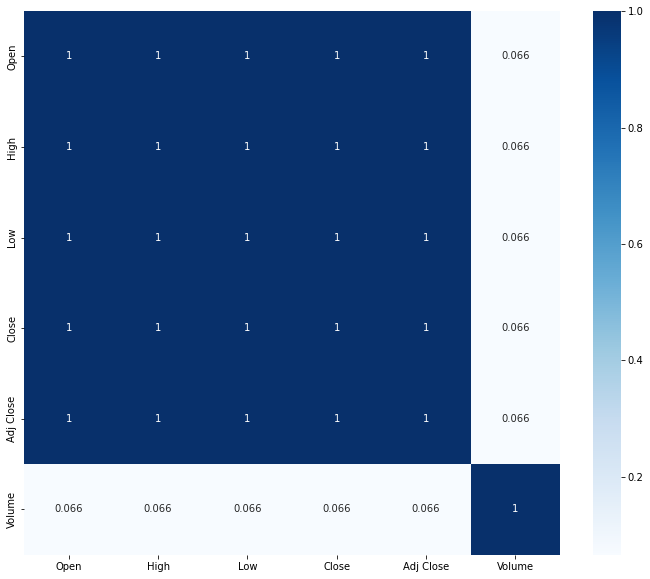

In [88]:
plt.figure(figsize=(12,10))
p = sns.heatmap(new_df.corr(), annot=True,cmap ='Blues')

In [90]:
new_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,20621.609375,20664.800781,20531.000000,20561.050781,20561.050781,12000
2011-01-04,20617.380859,20651.210938,20449.009766,20498.720703,20498.720703,15200
2011-01-05,20509.949219,20509.949219,20243.949219,20301.099609,20301.099609,14400
2011-01-06,20395.500000,20425.849609,20107.169922,20184.740234,20184.740234,16600
2011-01-07,20163.849609,20210.619141,19629.220703,19691.810547,19691.810547,15800


In [91]:
data=new_df.filter(['Close'])
df_new=data.values
df_new

array([[20561.05078125],
       [20498.72070312],
       [20301.09960938],
       ...,
       [52653.0703125 ],
       [52586.83984375],
       [52950.62890625]])

Text(0.5, 1.0, 'Stock Graph of S&P BSE SENSEX')

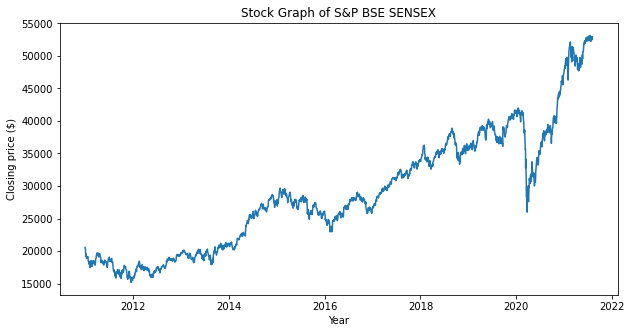

In [93]:
plt.figure(1,(10,5))
graph=plt.plot(new_df['Close'])
plt.xlabel("Year")
plt.ylabel("Closing price ($)")
plt.title("Stock Graph of S&P BSE SENSEX")

<h4><b>Min-max Normalization</b></h4>

In [139]:
 from sklearn.preprocessing import MinMaxScaler

In [148]:
scaler=MinMaxScaler(feature_range=(0,1),copy=True)
scaled_data=scaler.fit_transform(new_df)
scaled_data

array([[1.37152219e-01, 1.38034433e-01, 1.42497740e-01, 1.41796628e-01,
        1.41796628e-01, 3.74037404e-04],
       [1.37040378e-01, 1.37675395e-01, 1.40332194e-01, 1.40155662e-01,
        1.40155662e-01, 4.74618890e-04],
       [1.34198893e-01, 1.33943320e-01, 1.34916085e-01, 1.34952885e-01,
        1.34952885e-01, 4.49473519e-04],
       ...,
       [9.85429985e-01, 9.86430138e-01, 9.88492206e-01, 9.86684280e-01,
        9.86684280e-01, 2.73455917e-04],
       [9.88043913e-01, 9.89945284e-01, 9.87766385e-01, 9.84940629e-01,
        9.84940629e-01, 3.08030803e-04],
       [9.90924813e-01, 9.91967414e-01, 9.94902128e-01, 9.94518115e-01,
        9.94518115e-01, 2.45167374e-04]])

In [154]:
output = pd.DataFrame(scaled_data)
output.to_excel('BSE_Sensex_Processed_Data.xlsx', sheet_name='sheet1' )

<div style="font-family:verdana; word-spacing:1.5px;"><h4><b>Dividing dataset into train and test data</b></h4></div>

In [26]:
import math
train_len=math.ceil(len(df_new)*0.8)
test_len=len(data)-train_len
print("train_len=",train_len)
print("test_len=",test_len)

train_len= 2076
test_len= 518


In [27]:
train_data = scaled_data[0:train_len,:]

In [28]:
train_data.shape

(2076, 1)

In [29]:
test_data=scaled_data[train_len-60:,:]

In [30]:
test_data.shape

(578, 1)

<div style="font-family:verdana; word-spacing:1.5px;"><h2><center style="color:#159364; font-family:cursive;"> (4) Build Model using data till Mar’2021. Show code and describe the formula and present regression summary statistics and interpret it.</br> LSTM Model</center></h1></div>

<div style="font-family:verdana; word-spacing:1.5px;"><h4><b>Training model till March 2021</b><h4></div>

In [55]:
X_train = []
y_train = []
for i in range(60,len(train_data)):                 
  X_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print("X_train",X_train)
    print("y_train",y_train)
    print()

X_train [array([0.14179663, 0.14015566, 0.13495288, 0.13188949, 0.11891211,
       0.10659918, 0.10586784, 0.11476005, 0.10551191, 0.09702458,
       0.09759878, 0.10312222, 0.10012803, 0.10192403, 0.10089702,
       0.10468153, 0.09989448, 0.09239076, 0.08479649, 0.0830007 ,
       0.07495676, 0.07675749, 0.08620077, 0.07458634, 0.07535085,
       0.06846659, 0.06365059, 0.06023517, 0.06722685, 0.07969507,
       0.08158012, 0.08229357, 0.08771483, 0.07994044, 0.08591118,
       0.08216878, 0.07906666, 0.06469421, 0.06649761, 0.06972242,
       0.08612678, 0.08726568, 0.08717852, 0.080234  , 0.08594645,
       0.08674413, 0.08300651, 0.07895503, 0.08594198, 0.07878524,
       0.08381499, 0.07831737, 0.0711812 , 0.07013444, 0.07406375,
       0.07979934, 0.08360571, 0.09584516, 0.09920185, 0.10387912])]
y_train [0.10833836263646929]



In [56]:
type(X_train)

list

In [57]:
type(y_train)

list

In [58]:
X_train = np.array(X_train)     
y_train = np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(2016, 60, 1)

In [59]:
X_test=[]
y_test=df_new[train_len:,:]
for i in range(60,len(test_data)):
  X_test.append(test_data[i-60:i,0])

In [60]:
type(X_test)

list

In [61]:
type(y_test)

numpy.ndarray

In [62]:
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(518, 60, 1)

In [63]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [66]:
model.fit(X_train,y_train,batch_size=1,epochs=5)

Epoch 1/5
2016/2016 [==============================] - 32s 15ms/step - loss: 0.0010
Epoch 2/5
2016/2016 [==============================] - 29s 15ms/step - loss: 2.9195e-04
Epoch 3/5
2016/2016 [==============================] - 30s 15ms/step - loss: 2.2471e-04
Epoch 4/5
2016/2016 [==============================] - 30s 15ms/step - loss: 1.7045e-04
Epoch 5/5
2016/2016 [==============================] - 30s 15ms/step - loss: 1.3031e-04


<h2>Predictions</h2>

In [67]:
y_pred=model.predict(X_test)
y_pred=scaler.inverse_transform(y_pred)

17/17 [==============================] - 1s 12ms/step


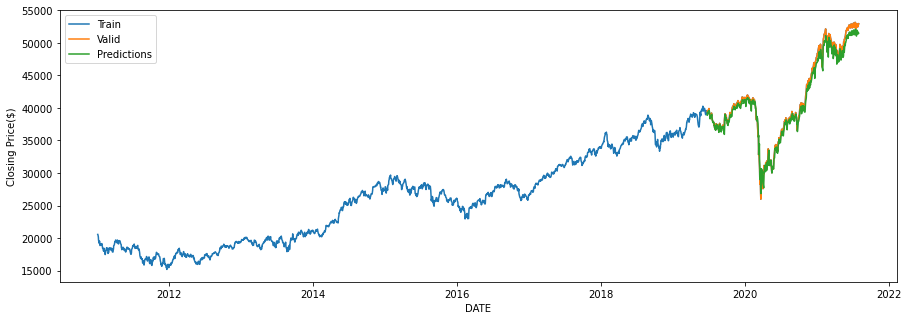

In [94]:
train=new_df[:train_len]
validation=new_df[train_len:]
validation['Predictions']=y_pred
plt.figure(figsize=(15,5))
plt.xlabel("DATE")
plt.ylabel("Closing Price($)")
plt.plot(new_df['Close'])
plt.plot(validation[['Close','Predictions']])
plt.legend(['Train','Valid','Predictions'])
plt.show()

In [95]:
last_60_days=data[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 20ms/step
[[51969.234]]


In [118]:
sample = pdr.get_data_yahoo("%5EBSESN", start="2021-04-01", end="2021-06-30")

[*********************100%***********************]  1 of 1 completed


<div style="font-family:verdana; word-spacing:1.5px;"><h2><center style="color:#159364; font-family:cursive;"> (6) Apply the model to predict index values for the Apr-Jun’2021 quarter and calculate a suitable metric to determine the prediction accuracy of the model.  </center></h1></div>

<div style="font-family:verdana; word-spacing:1.5px;"><h2><center style="color:#159364; font-family:cursive;"> WOOHOO! Here we have predicted the close prices of a quarter from April to June 2021 using</br> LSTM Model</center></h1></div>

In [119]:
sample

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,49868.531250,50092.480469,49478.531250,50029.828125,50029.828125,8500
2021-04-05,50020.910156,50028.671875,48580.800781,49159.320312,49159.320312,12700
2021-04-06,49441.128906,49582.261719,48936.351562,49201.390625,49201.390625,9600
2021-04-07,49277.089844,49900.128906,49093.898438,49661.761719,49661.761719,9800
2021-04-08,49885.261719,50118.078125,49581.609375,49746.210938,49746.210938,21800
2021-04-09,49743.390625,49906.910156,49461.011719,49591.320312,49591.320312,8900
2021-04-12,48956.648438,48956.648438,47693.441406,47883.378906,47883.378906,19100
2021-04-13,47991.531250,48627.429688,47775.320312,48544.058594,48544.058594,10000
2021-04-15,48512.769531,48887.851562,48010.550781,48803.679688,48803.679688,16100


<div style="font-family:verdana; word-spacing:1.5px;"><h2><center style="color:#159364; font-family:cursive;"> We have used 3 classifiers namely RandomForest, Adaboost and XGboost.  </center></h1></div>

In [157]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
md=new_df['Close'].median()
new_df['Close'].fillna(value=md,inplace=True)

In [104]:
new_df['Close'].isnull().sum()

0

In [105]:
X=new_df.drop('Close',axis=1)
y=new_df['Close']

In [106]:
print(X.shape,y.shape)

(2594, 5) (2594,)


In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)
X_train.shape

(2075, 5)

In [109]:
y_train.isnull().sum()

0

In [110]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)

In [ ]:
print('Mean Squared Error',mean_squared_error(y_test,pred))

In [131]:
!pip install xgboost

     -------------------------------------- 125.4/125.4 MB 7.2 MB/s eta 0:00:00


In [132]:
import xgboost

In [133]:
xgb = xgboost.XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [137]:
pred2=xgb.predict(X_test)
print('Mean Squared Error',mean_squared_error(y_test,pred2))

In [135]:
from sklearn.ensemble import AdaBoostRegressor

In [138]:
ada = AdaBoostRegressor()
ada.fit(X_train,y_train)
pred3 = ada.predict(X_test)
print('Mean Squared Error',mean_squared_error(y_test,pred3))

<div style="font-family:verdana; word-spacing:1.5px;"><h2><center style="color:#159364; font-family:cursive;"> COnclusion </br> Among the 3 classifiers namely RandomForest, Adaboost and XGboost the RandomForest gives the least error|</center></h1></div>